In [ ]:
#Dieser Code beschäftigt sich mit der Berechnung der Regenzeiten

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk

In [ ]:
#Mittlere Windrichtung
gdf=xr.open_dataset('/Users/weber-j/Documents/u10_all.nc')
gdf=gdf.isel(longitude=slice(0,89))
ggf=xr.open_dataset('/Users/weber-j/Documents/v10_all.nc')
ggf=ggf.isel(longitude=slice(0,89))
gd=180+180/np.pi*np.arctan(np.asarray(ggf.v10),np.asarray(gdf.u10))
gf=(gdf.u10*0+1)*gd
np.mean(gf[0:100000,52,24])

In [ ]:
gf[0,0,0]

In [ ]:
qw=xr.open_dataset('/Users/weber-j/Documents/wr10_all.nc')
qw

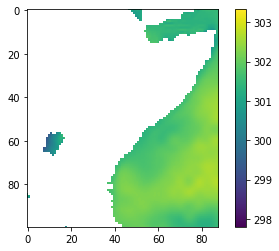

In [11]:
gd=xr.open_dataset('/Users/weber-j/Documents/Mean_sst.nc')
plt.imshow(gd.sst)
plt.colorbar()

In [13]:
#Anzahl der SST-Pixel
count=0
for i in range (0,len(gd.sst)):
    for j in range (0,len(gd.sst[0])):
        if gd.sst[i,j]>0:
            count=count+1
count

3215

In [9]:
#Berechnung temp über W-IOD
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(longitude=slice(100,121),time=slice(688,15000),latitude=slice(23,44))
else:
    gdf=gdf.isel(longitude=slice(100,121),time=slice(365,15000),latitude=slice(23,44))
    
lati=[]
for r in range (0,len(gdf.latitude)):
    lati.append(float(gdf.latitude[r]))
Deucor=np.cos(np.deg2rad(lati))*6371*2*math.pi/(np.cos(np.deg2rad(0))*6371*2*math.pi)  #Das wird für die Breitenkorrektur gebraucht

li=[]
lii=[]
for b in range (0,21):
    for a in range (0,21):
        li.append(Deucor[b])
    lii.append(li)
    li=[]
lii=np.asarray(lii)

lili=[]
for Jahr in range (0,39):
    print(Jahr)
    t=Jahr*365+59
    sch=int((Jahr)/4)   #Schaltjahr
    anfang=t+sch
    ende=anfang+31+30+31
    for k in range (anfang,ende):
        if k == anfang:
            gd=gdf.t2m[k]*lii
        else:
            gd=gd+gdf.t2m[k]*lii
    gd=gd/92
    lili.append(gd)

NameError: name 'math' is not defined

In [8]:
np.mean(dat.Alles)-np.std(dat.Alles)

1.3430360354801745

In [9]:
#Starkregenereignisse
dat=pd.read_csv('/Users/weber-j/Documents/Masterarbeit/Daten/Regendaten nach Ländern.csv',sep=';')
Länder=['Burundi','Dschibuti','Eritrea','Ethiopia','Kenia','Ruanda','Somalia','Tansania','SouthSudan','Sudan','Uganda',
        'Indischer_Ozean','Alles']
Länder_t2m=['t2m_Burundi','t2m_Dschibuti','t2m_Eritrea','t2m_Ethiopia','t2m_Kenia','t2m_Ruanda','t2m_Somalia','t2m_Tanzania',
            't2m_South_Sudan','t2m_Sudan','t2m_Uganda','t2m_Indian_Ocean','t2m_Alles']
prec=[0.04,0.00,0.00,0.18,0.17,0.10,0.04,0.39,0.04,0.00,0.55,0.58,0.85] #5. Perz der Länder
#prec=[0.20,0.00,0.00,0.47,0.31,0.26,0.06,0.62,0.12,0.00,0.99,0.80,1.12] #10. Perz
#prec=[1.08,0.01,0.00,1.35,0.78,1.00,0.18,1.45,0.52,0.00,2.42,1.32,1.71] #25. Perz
#prec=[4.19,0.12,0.06,2.85,1.90,3.34,0.65,3.24,1.50,0.03,4.94,2.39,2.63] #50. Perz
#prec=[7.48,0.56,0.44,4.66,4.05,6.21,2.12,5.93,3.75,0.56,8.01,4.09,3.89] #75. Perz
#prec=[8.37,0.79,0.64,5.17,4.69,6.95,2.66,6.81,4.48,0.84,8.89,4.56,4.22] #80. Perz
#prec=[10.51,1.63,1.55,6.52,6.91,9.27,4.12,9.06,6.73,2.03,11.25,5.99,5.06] #90. Perz
#prec=[12.29,2.97,3.12,7.82,8.84,11.42,5.27,10.86,8.85,3.25,13.29,7.34,5.86] #95. Perz
#ii=0
#ii=ii+1
for ii in range (0,13):
    ui=[]
    ba=[]
    print(Länder[ii])
    for i in range (0,39):
        cnt=0
        ab=[]
        for j in range (0,92):
            tag=i*92+j
            if getattr(dat,Länder[ii])[tag] > prec[ii]:
                cnt=cnt+1
                ab.append(getattr(dat,Länder[ii])[tag])
        #print('Jahr:',i+1980,cnt)
        ui.append(cnt)
        if len(ab)>0:
            ba.append(np.max(ab))
        else:
            ba.append(0)
    print(mk.original_test(ui))
    #plt.plot(ui)

Burundi
Mann_Kendall_Test(trend='decreasing', h=True, p=0.02393159890632157, z=-2.2582255855586437, Tau=-0.25101214574898784, s=-186.0, var_s=6711.333333333333, slope=-0.1111111111111111, intercept=89.11111111111111)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.18863377092979183, z=-1.3146315217320577, Tau=-0.14709851551956815, s=-109.0, var_s=6749.0, slope=-0.07142857142857142, intercept=88.35714285714286)
Eritrea
Mann_Kendall_Test(trend='decreasing', h=True, p=0.013715178543575623, z=-2.4646378757315577, Tau=-0.27530364372469635, s=-204.0, var_s=6784.0, slope=-0.25, intercept=83.75)
Ethiopia
Mann_Kendall_Test(trend='decreasing', h=True, p=0.016447518246186954, z=-2.398830677612474, Tau=-0.26450742240215924, s=-196.0, var_s=6608.0, slope=-0.10714285714285714, intercept=91.03571428571429)
Kenia
Mann_Kendall_Test(trend='no trend', h=False, p=0.22652565534446634, z=-1.2093571710667224, Tau=-0.1349527665317139, s=-100.0, var_s=6701.333333333333, slope=-0.06060606060606061, i

In [59]:
for i in range (0,13):
    print(Länder[i])
    print(mk.original_test(getattr(dat,Länder[i])))

Burundi
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-8.604184552431532, Tau=-0.09580862889307636, s=-616536.0, var_s=5134474933.333333, slope=-0.00044200573170771393, intercept=4.980490068817785)
Dschibuti
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-8.394666919649778, Tau=-0.09346227038739857, s=-601437.0, var_s=5133007536.333333, slope=-1.2683139022083432e-05, intercept=0.14142565283610664)
Eritrea
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-8.575037184448068, Tau=-0.09526566733146047, s=-613042.0, var_s=5111013381.333333, slope=-3.477735288090646e-06, intercept=0.06407531773919058)
Ethiopia
Mann_Kendall_Test(trend='decreasing', h=True, p=6.295598886651987e-08, z=-5.410195485281054, Tau=-0.06024324802279009, s=-387670.0, var_s=5134477235.333333, slope=-0.00018758736479225605, intercept=3.1823090502549114)
Kenia
Mann_Kendall_Test(trend='decreasing', h=True, p=1.3619839034362258e-07, z=-5.270303465169936, Tau=-0.058685535746419853, s=-377646.0, var_s=5

In [57]:
mk.original_test(dat.Tansania)

Mann_Kendall_Test(trend='decreasing', h=True, p=3.225476419288498e-08, z=-5.528735271676091, Tau=-0.06156320094332967, s=-396164.0, var_s=5134477235.333333, slope=-0.0002306396025666979, intercept=3.6569271802033723)

In [54]:
getattr(dat,Länder[i])

0       2.825793
1       3.267632
2       3.153245
3       3.053370
4       2.773728
          ...   
3583    2.371860
3584    2.074885
3585    2.374146
3586    2.383898
3587    2.122914
Name: Alles, Length: 3588, dtype: float64

In [50]:
#Hitzetagereignisse
#Temps=[18.51,24.44,25.41,22.64,24.03,18.78,25.83,21.20,26.28,27.41,21.50,26.47] #5%-Perzentil
#Temps=[18.82,25.17,26.32,23.02,24.38,19.09,26.1,21.51,26.96,28.49,21.80,26.71] #10%-Perzentil
Temps=[19.34,26.36,27.68,23.71,25.00,19.61,26.70,21.91,28.24,30.06,22.44,27.00] #25%-Perzentil
#Temps=[19.93,28.00,29.55,24.44,25.74,20.24,27.31,22.42,29.77,31.67,23.15,27.31] #50%-Perzentil
#Temps=[20.56,29.86,30.88,25.15,26.75,20.91,27.87,22.98,31.20,32.96,24.04,27.62] #75%-Perzentil
#Temps=[21.18,31.79,31.81,25.76,27.43,21.59,28.40,23.65,32.42,33.94,25.36,27.91] #90%-Perzentil
#Temps=[21.51,32.85,32.30,26.11,27.75,21.99,28.66,24.11,32.99,34.44,25.96,28.09] #95%-Perzentil
for ii in range (0,13):
    ui=[]
    ba=[]
    print(Länder[ii])
    for i in range (0,39):
        cnt=0
        ab=[]
        for j in range (0,92):
            tag=i*92+j
            if getattr(dat,Länder_t2m[ii])[tag] < Temps[ii]:
                cnt=cnt+1
                ab.append(getattr(dat,Länder_t2m[ii])[tag])
        #print('Jahr:',i+1980,cnt)
        ui.append(cnt)
        if len(ab)>0:
            ba.append(np.max(ab))
        else:
            ba.append('nan')
    print(mk.original_test(ui))

Burundi
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0016433218805425032, z=-3.148105826939482, Tau=-0.3522267206477733, s=-261.0, var_s=6821.0, slope=-0.64, intercept=34.16)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.3140217572310764, z=-1.0068190106995707, Tau=-0.11336032388663968, s=-84.0, var_s=6796.0, slope=-0.1111111111111111, intercept=25.11111111111111)
Eritrea
Mann_Kendall_Test(trend='decreasing', h=True, p=0.010917941443926438, z=-2.545314311614511, Tau=-0.28475033738191635, s=-211.0, var_s=6807.0, slope=-0.3125, intercept=28.9375)
Ethiopia
Mann_Kendall_Test(trend='decreasing', h=True, p=2.2568576033554777e-05, z=-4.2378347670339185, Tau=-0.47368421052631576, s=-351.0, var_s=6821.0, slope=-0.75, intercept=31.25)
Kenia
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0009073548012887844, z=-3.317781357210781, Tau=-0.37112010796221323, s=-275.0, var_s=6820.333333333333, slope=-0.625, intercept=28.875)
Ruanda
Mann_Kendall_Test(trend='decreasing', h=True, p=

IndexError: list index out of range

In [177]:
#Start der Regenzeit, Definition: 7 Tage in Folge oberhalb des 50. Perzentils (Median)
prec=[4.19,0.12,0.06,2.85,1.90,3.34,0.65,3.24,1.50,0.03,4.94,2.39,2.63] #50. Perz
lilli=[]
for Lnd in range (0,13):
    print('Land:',Länder[Lnd])
    lili=[]
    for Jahr in range (0,39):
        Tag=0
        while Tag < 85:
            i=Jahr*92+Tag
            if getattr(dat,Länder[Lnd])[i] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+1] > prec[Lnd] and getattr(dat,Länder[Lnd])
            [i+2] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+3] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+4] > prec[Lnd] and 
            getattr(dat,Länder[Lnd])[i+5] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+6]:
                print(Tag)
                lili.append(Tag)
                Tag=100
            Tag=Tag+1
            if Tag == 85:
                print('nan')
                lili.append('nan')
    lilli.append(lili)

Land: Burundi
2
11
13
13
26
0
15
5
26
10
0
23
37
43
0
22
11
23
23
24
27
19
41
45
5
18
12
40
4
28
0
13
33
4
nan
21
30
46
8
Land: Dschibuti
4
0
0
0
15
23
14
0
40
10
18
0
0
28
9
0
11
6
0
0
56
2
14
43
26
2
7
20
nan
24
0
4
38
17
23
15
23
19
32
Land: Eritrea
0
9
26
5
68
27
32
0
41
13
20
8
0
40
11
0
17
27
48
0
58
8
16
18
34
2
27
nan
69
26
43
55
37
17
57
62
31
55
32
Land: Ethiopia
43
9
33
32
67
23
30
4
39
12
27
23
34
41
47
34
16
23
50
55
44
22
47
42
32
15
30
40
69
41
0
55
50
17
57
62
38
55
31
Land: Kenia
37
9
27
52
39
18
3
35
22
16
3
24
28
45
22
35
24
27
39
9
35
23
41
25
28
17
0
41
19
nan
18
15
43
24
66
21
40
59
0
Land: Ruanda
0
11
51
52
33
23
1
6
15
32
0
26
48
58
61
40
22
31
62
25
28
35
1
56
6
35
68
40
39
69
22
13
34
17
46
25
42
46
0
Land: Somalia
57
8
28
32
46
23
39
59
39
19
25
24
36
43
45
3
15
24
47
55
38
42
41
43
32
41
31
42
46
42
28
60
45
17
63
20
44
57
32
Land: Tansania
0
16
3
12
10
18
3
4
9
2
0
23
0
10
0
0
11
22
3
0
0
3
0
21
5
0
2
7
0
9
0
2
2
4
9
19
19
0
0
Land: SouthSudan
24
10
52
31
2

In [178]:
#Ende der Regenzeit, Definition: 7 Tage in Folge oberhalb des 50. Perzentils
prec=[4.19,0.12,0.06,2.85,1.90,3.34,0.65,3.24,1.50,0.03,4.94,2.39,2.63] #50. Perz
lilli2=[]
for Lnd in range (0,13):
    print('Land:',Länder[Lnd])
    liz=[]
    for Jahr in range (0,39):
        Tag=0
        lili=[]
        if lilli[Lnd][Jahr] == 'nan':
            liz.append('nan')
            print('nan')
        else:
            for Tag in range (85,lilli[Lnd][Jahr]-1,-1):
                i=Jahr*92+Tag
                if getattr(dat,Länder[Lnd])[i] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+1] > prec[Lnd] and getattr(dat,Länder[Lnd])
                [i+2] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+3] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+4] > prec[Lnd] and 
                getattr(dat,Länder[Lnd])[i+5] > prec[Lnd] and getattr(dat,Länder[Lnd])[i+6]:
                    lili.append(Tag+1)
                    print(Tag+1)
                    break
                else:
                    lili.append(Tag)
                if Tag == lilli[Lnd][Jahr]:
                    print('nan')
                    lili.append('nan')
            liz.append(np.min(lili))
    lilli2.append(liz)

Land: Burundi
52
70
72
57
43
68
66
66
51
72
39
85
62
66
62
57
37
74
68
31
33
27
57
49
40
66
51
47
49
41
23
51
64
59
nan
47
57
49
57
Land: Dschibuti
59
61
72
86
86
71
77
86
55
56
54
32
67
81
74
57
86
53
55
10
66
72
47
51
41
82
57
43
nan
74
66
82
41
64
84
67
67
75
62
Land: Eritrea
74
52
86
80
84
85
54
86
55
77
56
82
66
78
69
56
86
86
54
9
61
68
41
51
48
85
75
nan
74
31
84
82
55
64
83
86
84
78
55
Land: Ethiopia
73
76
72
86
86
84
78
86
77
79
68
81
72
86
86
54
86
74
72
64
68
86
61
57
59
85
74
57
70
42
86
86
65
69
82
86
70
75
86
Land: Kenia
72
76
76
82
43
68
80
86
76
75
80
81
59
74
73
58
82
61
72
57
69
53
68
72
60
86
60
53
50
nan
75
64
73
67
69
68
58
65
67
Land: Ruanda
71
73
74
57
34
67
66
67
68
72
68
80
60
69
62
67
29
74
70
27
33
52
67
58
41
66
74
41
40
70
23
53
67
63
69
56
57
48
52
Land: Somalia
77
70
85
86
85
80
86
85
58
77
54
82
66
82
83
86
85
61
65
72
72
73
61
86
60
84
76
74
80
77
83
77
81
68
79
66
71
75
78
Land: Tansania
66
64
69
56
52
63
57
65
45
71
47
79
62
49
35
56
34
73
43
36
36
51

In [156]:
#Länge der Regenzeit: Ende - Start
lii=[]
for i in range (len(lilli)):
    li=[]
    for j in range (len(lilli[0])):
        if lilli2[i][j] == 'nan':
            li.append('nan')
        else:
            li.append(lilli2[i][j]-lilli[i][j])
    lii.append(li)

In [159]:
for i in range (0,13):
    print(Länder[i])
    print(mk.original_test(lilli2[i]))

Burundi
Mann_Kendall_Test(trend='decreasing', h=True, p=0.03010845024309261, z=-2.1686607379736422, Tau=-0.2460881934566145, s=-173.0, var_s=6290.333333333333, slope=-0.4444444444444444, intercept=65.22222222222223)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.5455940028077524, z=-0.6043755269031175, Tau=-0.06970128022759602, s=-49.0, var_s=6307.666666666667, slope=-0.14705882352941177, intercept=68.72058823529412)
Eritrea
Mann_Kendall_Test(trend='no trend', h=False, p=0.7431784066292755, z=-0.32764723047594657, Tau=-0.03840682788051209, s=-27.0, var_s=6297.0, slope=-0.03571428571428571, intercept=74.66071428571429)
Ethiopia
Mann_Kendall_Test(trend='no trend', h=False, p=0.36456724453963485, z=-0.9066966328195839, Tau=-0.10121457489878542, s=-75.0, var_s=6661.0, slope=-0.06896551724137931, intercept=76.3103448275862)
Kenia
Mann_Kendall_Test(trend='decreasing', h=True, p=0.01310931751524591, z=-2.480785660723177, Tau=-0.28165007112375534, s=-198.0, var_s=6306.0, slope=-0.3

In [190]:
#Start der Regenzeit, Definition: 7 Tage in Folge oberhalb des 50. Perzentils, halbes Jahr
dats=pd.read_csv('/Users/weber-j/Documents/Masterarbeit/Daten/Regendaten Jahr.csv',sep=';')
Länder_e=['Burundi','Dschibuti','Eritrea','Ethiopia','Kenya','Rwanda','Somalia','Tanzania','SouthSudan','Sudan','Uganda',
          'IndianOcean','Alles']
#prec=[0.00,0.00,0.00,0.06,0.19,0.00,0.03,0.20,0.00,0.00,0.49,0.51,1.22]     #5. Perzentil
#prec=[0.00,0.00,0.00,0.17,0.31,0.01,0.05,0.30,0.02,0.00,0.91,0.63,1.42]     #10. Perzentil
#prec=[0.12,0.02,0.00,0.83,0.67,0.28,0.13,0.64,0.42,0.00,2.04,0.90,1.86]     #25. Perzentil
prec=[2.79,0.19,0.17,3.02,1.49,2.13,0.34,2.12,2.34,0.38,4.21,1.40,2.50]     #50. Perzentil
#prec=[6.97,0.68,0.75,4.97,2.81,5.43,0.98,5.30,5.41,2.51,6.88,2.68,3.35]     #75. Perzentil
#prec=[10.13,1.69,1.58,6.26,4.81,8.66,2.56,8.15,8.30,5.09,9.61,4.51,4.59]    #90. Perzentil
#prec=[11.87,3.10,2.78,7.21,6.65,10.54,3.90,9.81,10.06,6.90,11.45,5.84,5.41] #95. Perzentil

lilli=[]
for Lnd in range (0,13):
    print('Land:',Länder[Lnd])
    lili=[]
    for Jahr in range (0,39):
        schalt=1+int(Jahr/4)
        Tag=0
        while Tag < 190:
            i=Jahr*365+Tag+schalt
            if getattr(dats,Länder_e[Lnd])[i] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+1] > prec[Lnd] and getattr
            (dats,Länder_e[Lnd])[i+2] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+3] > prec[Lnd] and getattr(dats,Länder_e[Lnd])
            [i+4] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+5] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+6]:
                print(Tag)
                lili.append(Tag)
                Tag=200
            Tag=Tag+1
            if Tag == 190:
                print('nan')
                lili.append('nan')
    lilli.append(lili)

Land: Burundi
23
0
0
1
0
21
0
0
16
0
0
4
37
4
21
0
8
45
6
7
61
2
0
0
7
71
12
0
9
19
0
4
57
0
19
18
7
29
1
Land: Dschibuti
16
13
12
24
74
22
32
49
7
32
16
39
1
0
105
35
12
17
0
20
115
121
0
17
4
10
12
8
6
17
36
13
19
5
37
8
82
32
91
Land: Eritrea
147
68
11
23
14
86
45
56
42
32
14
38
19
10
183
59
14
18
9
59
102
107
83
87
14
7
0
157
170
74
19
182
162
63
109
107
8
28
84
Land: Ethiopia
102
68
92
91
126
82
90
63
99
75
50
82
113
100
106
93
75
82
109
114
116
123
106
101
91
74
89
99
149
178
56
114
109
76
116
121
97
114
91
Land: Kenia
96
68
41
41
97
22
61
73
1
33
0
83
87
11
41
38
83
86
0
65
94
2
10
84
87
75
55
29
13
nan
56
74
91
83
37
80
12
118
58
Land: Ruanda
55
0
73
46
10
22
0
13
0
0
29
23
87
9
51
69
32
82
6
7
69
20
10
104
65
78
89
33
37
19
0
72
93
76
103
79
7
105
0
Land: Somalia
94
67
87
28
102
75
58
94
80
77
50
66
95
21
94
60
74
82
0
66
96
93
90
101
90
99
90
100
11
93
56
111
103
75
70
78
98
115
80
Land: Tansania
0
0
0
0
0
0
0
0
0
0
0
0
0
6
1
0
2
8
0
0
27
0
0
0
6
0
9
0
10
19
0
3
2
0
4
0
6
24


In [191]:
for i in range (0,13):
    print(Länder[i])
    print(mk.original_test(lilli[i]))

Burundi
Mann_Kendall_Test(trend='no trend', h=False, p=0.1350322686494636, z=1.4945486785797333, Tau=0.16464237516869096, s=122.0, var_s=6554.666666666667, slope=0.10714285714285714, intercept=3.9642857142857144)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.9131922933350132, z=0.10901285620008958, Tau=0.01349527665317139, s=10.0, var_s=6816.0, slope=0.0, intercept=17.0)
Eritrea
Mann_Kendall_Test(trend='no trend', h=False, p=0.30342657373606885, z=1.0291130090805432, Tau=0.11605937921727395, s=86.0, var_s=6822.0, slope=0.7142857142857143, intercept=42.42857142857143)
Ethiopia
Mann_Kendall_Test(trend='no trend', h=False, p=0.06563900502649966, z=1.8408809609968007, Tau=0.20647773279352227, s=153.0, var_s=6817.666666666667, slope=0.6111111111111112, intercept=87.38888888888889)
Kenia
Mann_Kendall_Test(trend='no trend', h=False, p=0.6872439735153284, z=0.4025980104551892, Tau=0.04694167852062589, s=33.0, var_s=6317.666666666667, slope=0.2, intercept=55.8)
Ruanda
Mann_Kendall_

In [192]:
#Ende der Regenzeit, Definition: 7 Tage in Folge oberhalb des 50. Perzentils, halbes Jahr
lilli2=[]
for Lnd in range (0,13):
    print('Land:',Länder[Lnd])
    liz=[]
    for Jahr in range (0,39):
        Tag=0
        schalt=1+int(Jahr/4)
        lili=[]
        if lilli[Lnd][Jahr] == 'nan':
            liz.append('nan')
            print('nan')
        else:
            for Tag in range (190,lilli[Lnd][Jahr]-1,-1):
                i=Jahr*365+Tag+schalt
                if getattr(dats,Länder_e[Lnd])[i] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+1] > prec[Lnd] and getattr
                (dats,Länder_e[Lnd])[i+2] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+3] > prec[Lnd] and getattr
                (dats,Länder_e[Lnd])[i+4] > prec[Lnd] and getattr(dats,Länder_e[Lnd])[i+5] > prec[Lnd] and getattr
                (dats,Länder_e[Lnd])[i+6]:
                    lili.append(Tag+1)
                    print(Tag+1)
                    break
                else:
                    lili.append(Tag)
                if Tag == lilli[Lnd][Jahr]:
                    print('nan')
                    lili.append('nan')
            liz.append(np.min(lili))
    lilli2.append(liz)

Land: Burundi
111
131
132
122
103
127
125
125
117
131
128
145
121
132
121
124
96
133
128
91
97
97
123
108
110
125
134
112
109
129
120
110
123
122
111
115
118
110
116
Land: Dschibuti
191
119
130
147
191
190
190
146
191
191
113
91
94
140
126
115
189
186
189
191
187
122
106
110
99
189
116
191
150
133
191
141
100
191
143
126
121
134
186
Land: Eritrea
191
189
179
147
191
191
191
186
191
187
115
191
177
191
191
191
191
191
189
191
191
191
191
191
188
191
191
191
191
191
191
187
191
191
191
133
191
191
191
Land: Ethiopia
191
187
186
180
191
191
185
191
191
191
187
191
159
191
191
191
191
191
191
183
188
191
185
191
191
191
191
191
184
191
187
160
191
191
191
191
191
191
182
Land: Kenia
139
175
171
177
104
134
174
181
159
191
139
155
162
159
182
147
191
184
181
118
175
159
127
142
119
145
133
169
109
nan
134
161
132
165
159
152
188
124
155
Land: Ruanda
148
150
136
122
130
135
125
152
127
152
127
145
121
133
132
131
142
133
131
120
92
111
126
123
100
146
134
106
109
129
120
113
126
126
128
115


In [193]:
for i in range (0,13):
    print(Länder[i])
    print(mk.original_test(lilli2[i]))

Burundi
Mann_Kendall_Test(trend='no trend', h=False, p=0.09955321719444621, z=-1.647023492469675, Tau=-0.18488529014844804, s=-137.0, var_s=6818.333333333333, slope=-0.28125, intercept=126.34375)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.4655940998010517, z=-0.7296664396405981, Tau=-0.08232118758434548, s=-61.0, var_s=6761.666666666667, slope=-0.12, intercept=145.28)
Eritrea
Mann_Kendall_Test(trend='no trend', h=False, p=0.09229140186907725, z=1.6834324704319117, Tau=0.14979757085020243, s=111.0, var_s=4269.666666666667, slope=0.0, intercept=191.0)
Ethiopia
Mann_Kendall_Test(trend='no trend', h=False, p=0.612342729353526, z=0.5067322067384343, Tau=0.048582995951417005, s=36.0, var_s=4770.666666666667, slope=0.0, intercept=191.0)
Kenia
Mann_Kendall_Test(trend='no trend', h=False, p=0.208156718315901, z=-1.2586501670085712, Tau=-0.14366998577524892, s=-101.0, var_s=6312.333333333333, slope=-0.5, intercept=168.25)
Ruanda
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0

In [194]:
#Länge der Regenzeit, halbes Jahr
lii=[]
for i in range (len(lilli)):
    li=[]
    for j in range (len(lilli[0])):
        if lilli2[i][j] == 'nan':
            li.append('nan')
        else:
            li.append(lilli2[i][j]-lilli[i][j])
    lii.append(li)

In [195]:
for i in range (0,13):
    print(Länder[i])
    print(mk.original_test(lii[i]))

Burundi
Mann_Kendall_Test(trend='decreasing', h=True, p=0.038383288203850174, z=-2.070737987266212, Tau=-0.2321187584345479, s=-172.0, var_s=6819.333333333333, slope=-0.4827586206896552, intercept=117.17241379310344)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.43143516176451335, z=-0.7867381580854176, Tau=-0.08906882591093117, s=-66.0, var_s=6826.0, slope=-0.52, intercept=126.88)
Eritrea
Mann_Kendall_Test(trend='no trend', h=False, p=0.5135456648074745, z=-0.6533267280718555, Tau=-0.07422402159244265, s=-55.0, var_s=6831.666666666667, slope=-0.5142857142857142, intercept=139.77142857142857)
Ethiopia
Mann_Kendall_Test(trend='no trend', h=False, p=0.11552856054721716, z=-1.5738221984940102, Tau=-0.1767881241565452, s=-131.0, var_s=6823.0, slope=-0.5714285714285714, intercept=101.85714285714286)
Kenia
Mann_Kendall_Test(trend='no trend', h=False, p=0.21778614454266076, z=-1.2324363093815252, Tau=-0.14082503556187767, s=-99.0, var_s=6323.0, slope=-1.0, intercept=121.0)
Ruanda

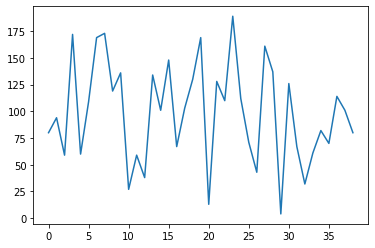

In [174]:
plt.plot(np.asarray(lii[12]))

In [182]:
#Herausfinden der durchschnittlichen Länge der dry spells innerhalb der Regenzeiten
liiis=[]
for land in range (0,13):
    liis=[]
    for yr in range (0,39):
        anf=lilli[land][yr]
        end=lilli2[land][yr]
        cnt=0
        lis=[]
        if end == 'nan':
            liis.append('nan')
        else:
            for Tag in range (int(anf),int(end)):
                i=yr*92+Tag
                if getattr(dat,Länder[land])[i] < prec[land]:
                    cnt=cnt+1
                    lis.append(cnt)
                else:
                    cnt=0
            if len(lis)>0:
                liis.append(np.max(lis))
            else:
                liis.append(0)
    liiis.append(liis)
liiis

[[10,
  1,
  7,
  4,
  1,
  9,
  1,
  5,
  2,
  8,
  2,
  8,
  3,
  3,
  6,
  4,
  2,
  4,
  6,
  0,
  0,
  0,
  1,
  0,
  5,
  10,
  2,
  0,
  7,
  2,
  7,
  5,
  4,
  3,
  'nan',
  3,
  3,
  0,
  2],
 [8,
  6,
  12,
  6,
  18,
  2,
  9,
  14,
  0,
  4,
  9,
  3,
  5,
  4,
  15,
  5,
  10,
  4,
  14,
  0,
  0,
  26,
  9,
  0,
  1,
  17,
  11,
  4,
  'nan',
  30,
  10,
  18,
  0,
  9,
  6,
  20,
  3,
  27,
  1],
 [8,
  2,
  6,
  2,
  0,
  3,
  3,
  13,
  0,
  9,
  13,
  13,
  10,
  5,
  12,
  8,
  11,
  13,
  0,
  0,
  0,
  15,
  5,
  12,
  1,
  22,
  7,
  'nan',
  0,
  0,
  4,
  3,
  2,
  9,
  2,
  13,
  7,
  1,
  1],
 [7,
  3,
  3,
  4,
  1,
  0,
  4,
  9,
  4,
  5,
  8,
  6,
  9,
  1,
  2,
  4,
  8,
  6,
  3,
  0,
  1,
  5,
  6,
  0,
  2,
  21,
  8,
  4,
  0,
  0,
  11,
  4,
  2,
  4,
  3,
  10,
  3,
  3,
  6],
 [4,
  2,
  2,
  4,
  0,
  1,
  8,
  4,
  6,
  6,
  4,
  4,
  7,
  2,
  7,
  3,
  14,
  2,
  5,
  7,
  9,
  3,
  1,
  14,
  4,
  10,
  10,
  0,
  9,
  'nan',
  3,
  14,
  2,


In [183]:
for i in range (0,13):
    print(Länder[i])
    print(mk.original_test(liiis[i]))

Burundi
Mann_Kendall_Test(trend='no trend', h=False, p=0.21894948704938066, z=-1.2293263089136843, Tau=-0.13940256045519203, s=-98.0, var_s=6226.0, slope=-0.05263157894736842, intercept=3.973684210526316)
Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.6957374129536444, z=0.39108093418399736, Tau=0.04551920341394026, s=32.0, var_s=6283.333333333333, slope=0.030303030303030304, intercept=6.4393939393939394)
Eritrea
Mann_Kendall_Test(trend='no trend', h=False, p=0.667019690815053, z=-0.43024189297321497, Tau=-0.049786628733997154, s=-35.0, var_s=6245.0, slope=0.0, intercept=5.0)
Ethiopia
Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0, Tau=0.0, s=0.0, var_s=6722.666666666667, slope=0.0, intercept=4.0)
Kenia
Mann_Kendall_Test(trend='no trend', h=False, p=0.6664671102921078, z=-0.4310017331449696, Tau=-0.049786628733997154, s=-35.0, var_s=6223.0, slope=0.0, intercept=4.0)
Ruanda
Mann_Kendall_Test(trend='no trend', h=False, p=0.49327236723999146, z=-0.6851133965952418, Ta